# Вишинська Наталія, група ОІ-21сп, варіант 3, ЛР №2
## Опис компанії-замовника
- Best Friends Animal Society – це неприбуткова організація в США, яка активно працює над зниженням кількості тварин, що евтаназуються в притулках, та сприяє усиновленню домашніх тварин. Організація намагається забезпечити кожній тварині можливість знайти новий дім, шляхом розробки рішень, які підвищують ймовірність їх усиновлення.

## Запит
- Компанія має на меті розробити рішення, яке б прогнозувало ймовірність усиновлення тварин, що знаходяться в притулках. Ця інформація дозволить притулкам краще розуміти потреби тварин, сприяючи їх успішному усиновленню.

## Пропозиція реалізації
- Запропоновано створити модель машинного навчання, яка аналізуватиме різноманітні характеристики тварин, такі як вік, порода, здоров'я, поведінка, а також інші важливі фактори, що впливають на шанси тварини бути усиновленою. Це дозволить організації покращити процес усиновлення та підвищити шанси кожної тварини знайти новий дім.
## Опис даних:
### Набір даних складається з наступних стовпців:
- Type – тип тварини (1 – собака, 2 – кіт)
- Name – ім'я тварини
- Age – вік у місяцях
- Gender – стать тварини (1 – чоловіча, 2 – жіноча, 3 – невідома)
- MaturitySize – розмір дорослої особини (1 – маленька, 2 – середня, 3 – велика, 4 – дуже велика)
- FurLength – довжина шерсті (1 – коротка, 2 – середня, 3 – довга)
- Vaccinated – чи вакцинована тварина (1 – так, 2 – ні, 3 – невідомо)
- Dewormed – чи проглистована тварина
- Sterilized – чи стерилізована тварина
- Health – стан здоров'я (1 – здоровий, 2 – незначні проблеми, 3 – серйозні проблеми)
- AdoptionSpeed – швидкість усиновлення (0 – в день публікації, 1 – за тиждень, 2 – до місяця, 3 – після місяця, 4 – не був усиновлений)

# 1. Підготовка даних
## Завантаження даних
- Першим кроком стало завантаження даних з CSV-файлу, що містить інформацію про тварин, доступних для усиновлення. Для цього використовували бібліотеку pandas, яка дозволяє зручно працювати з табличними даними.

In [3]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
ds = pd.read_csv('variant_3.csv')

## Огляд даних
- Перш ніж почати очищення даних, необхідно виконати попередній огляд, щоб зрозуміти структуру набору даних та ідентифікувати можливі проблеми.

In [5]:
print("Початкова структура даних:")
print(ds.info())
print("Перші 5 рядків даних:")
print(ds.head())

Початкова структура даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1356 non-null   int64  
 1   Type           1356 non-null   int64  
 2   Name           1244 non-null   object 
 3   Age            1356 non-null   int64  
 4   Gender         1289 non-null   float64
 5   MaturitySize   1221 non-null   float64
 6   FurLength      1356 non-null   int64  
 7   Vaccinated     1356 non-null   int64  
 8   Dewormed       1356 non-null   int64  
 9   Sterilized     1356 non-null   int64  
 10  Health         1356 non-null   int64  
 11  Quantity       1356 non-null   int64  
 12  Fee            1356 non-null   int64  
 13  State          1356 non-null   int64  
 14  RescuerID      1356 non-null   object 
 15  VideoAmt       1356 non-null   int64  
 16  Description    1356 non-null   object 
 17  PetID          1356 non-n

- Цей етап дозволяє виявити типи даних у стовпцях, кількість відсутніх значень, а також базову інформацію про кожну з характеристик тварин.

## Кількість відсутніх значень

In [7]:
missing = []

for col in ds.columns:
    if ds[col].isnull().sum() != 0:
        print(col, ds[col].isnull().sum())
        missing.append(col)


Name 112
Gender 67
MaturitySize 135
ColorName 207
BreedName_x 148
BreedName_y 135


In [8]:
print('Кількість записів та кількість стовпців', ds.shape)

Кількість записів та кількість стовпців (1356, 26)


# 2. Обробка відсутніх значень
- Наступним кроком є обробка відсутніх значень. Для цього ми використовуємо різні методи в залежності від типу даних.
- Категоріальні ознаки: Пропущені значення для порід тварин заповнюємо модою (найчастіше зустрічається значення), оскільки це дозволить зберегти структуру даних без значних спотворень.

In [10]:
# Функція для заповнення відсутніх значень
def impute_na(df, variable, value):
    return df[variable].fillna(value)

# Заповнення пропущених значень
# Заповнення стовпця 'Name' певним значенням
ds['Name'] = impute_na(ds, 'Name', 'Unknown_Name')  # Якщо ім'я невідоме

# Заповнення стовпця 'Gender' модою або значенням "невідома" (3)
ds['Gender'] = impute_na(ds, 'Gender', 3)  # 3 – невідома стать

# Заповнення стовпця 'MaturitySize' модою
ds['MaturitySize'] = impute_na(ds, 'MaturitySize', ds['MaturitySize'].mode()[0])

# Заповнення стовпця 'ColorName' модою
ds['ColorName'] = impute_na(ds, 'ColorName', ds['ColorName'].mode()[0])

# Заповнення стовпців 'BreedName_x' та 'BreedName_y' модою
ds['BreedName_x'] = impute_na(ds, 'BreedName_x', ds['BreedName_x'].mode()[0])
ds['BreedName_y'] = impute_na(ds, 'BreedName_y', ds['BreedName_y'].mode()[0])


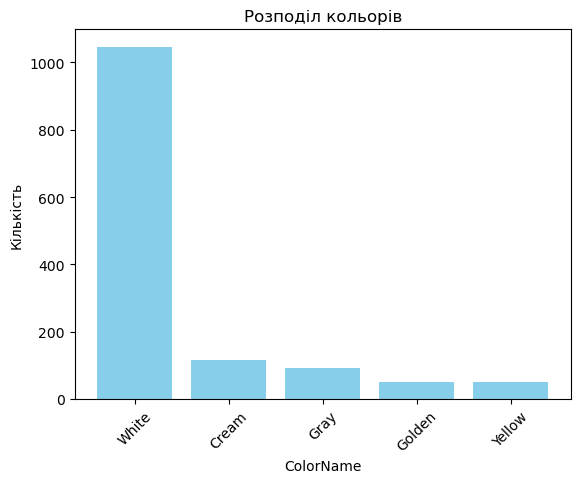

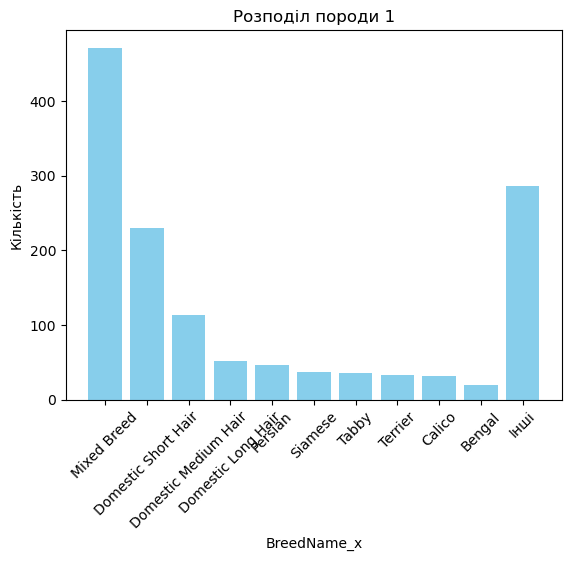

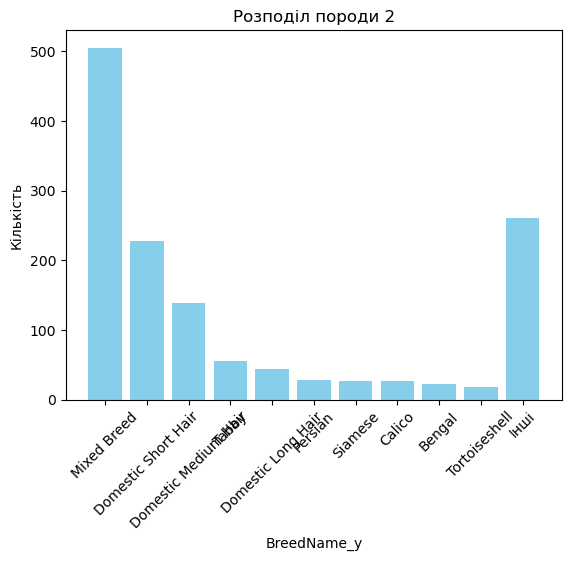

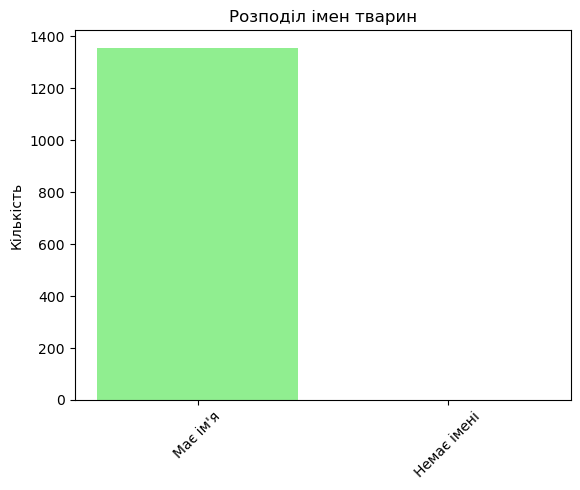

In [11]:
# Функція для побудови гістограм для категоріальних колонок
def plot_categorical_distribution(df, column_name, title):
    counts = df[column_name].value_counts()  # Отримуємо кількість кожного значення
    
    # Якщо немає даних, виводимо повідомлення і повертаємо
    if counts.empty:
        print(f'Немає даних для {title}.')
        return
    
    # Вибираємо топ 10 значень або об’єднуємо менш популярні в "Інші"
    top_counts = counts.head(10)
    other_count = counts[10:].sum()
    if other_count > 0:
        top_counts['Інші'] = other_count
    
    labels = top_counts.index  # Назви значень
    values = top_counts.values  # Кількість для кожного значення

    plt.bar(labels, values, color='skyblue')  # Побудова стовпчикової діаграми
    plt.title(title)
    plt.ylabel('Кількість')
    plt.xlabel(column_name)
    plt.xticks(rotation=45, fontsize=10)  # Зменшення розміру шрифту для міток
    plt.show()

# Функція для побудови гістограми для імен
def plot_name_distribution(df):
    name_counts = df['Name'].notnull().value_counts()  # Кількість наявних та відсутніх імен
    labels = ['Має ім\'я', 'Немає імені']
    counts = [name_counts.get(True, 0), name_counts.get(False, 0)]  # Кількість тварин з іменами та без імен
    
    plt.bar(labels, counts, color=['lightgreen', 'salmon'])  # Побудова стовпчикової діаграми
    plt.title('Розподіл імен тварин')
    plt.ylabel('Кількість')
    plt.xticks(rotation=45)
    plt.show()

# Виклик функцій для колонок
plot_categorical_distribution(ds, 'ColorName', 'Розподіл кольорів')
plot_categorical_distribution(ds, 'BreedName_x', 'Розподіл породи 1')
plot_categorical_distribution(ds, 'BreedName_y', 'Розподіл породи 2')
plot_name_distribution(ds)  # Гістограма для імен

# 3. Кодування категоріальних ознак

In [13]:
from sklearn.preprocessing import OneHotEncoder
# Кількість унікальних значень у кожному стовпці:
ds.nunique()

Unnamed: 0       1356
Type                2
Name             1148
Age                51
Gender              3
MaturitySize        4
FurLength           3
Vaccinated          3
Dewormed            3
Sterilized          3
Health              3
Quantity           13
Fee                28
State              12
RescuerID         819
VideoAmt            8
Description      1323
PetID            1356
PhotoAmt           30
AdoptionSpeed       5
ColorName_x         5
ColorName_y         5
ColorName           5
BreedName_x        94
BreedName_y        86
StateName_x        12
dtype: int64

In [14]:
# Унікальні значення усіх стовпців
for col in ds.columns:
    print(col, '->', ds[col].unique())

Unnamed: 0 -> [   0    1    2 ... 1353 1354 1355]
Type -> [2 1]
Name -> ['Golden Tabby Girl' 'Ogen & Oyen' 'Noah And Nellie' ...
 '9 Puppies For Adoption!' 'Mimi ;D' 'Blackie (å°\x8fé»\x91)']
Age -> [  1   2  12  36  96   3  18   4   6   8  24   5  32  20  16  14   0  48
  31  72   7  10  60  11  13  76  22  92   9  29  84  21  15  73  26 108
  25  19  65  33  37  17 120  30  27  38 212  64  69  28  51]
Gender -> [2. 3. 1.]
MaturitySize -> [2. 1. 3. 4.]
FurLength -> [1 2 3]
Vaccinated -> [2 1 3]
Dewormed -> [1 2 3]
Sterilized -> [2 3 1]
Health -> [1 2 3]
Quantity -> [ 1  2  3  6  4  5  7 20  8 10 11  9 15]
Fee -> [ 50   0 100 150  80   8  99 200  14  30 250  25 120  15  20 300  10 400
   1  40 550 160  65 600 500 135 180 750]
State -> [41326 41401 41327 41336 41330 41361 41325 41332 41324 41335 41342 41367]
RescuerID -> ['438a9bdce8ef4d5948fc40e422d34d0d' '15316b9044ea4f6a57f6cb4b45fc67aa'
 '2e4363f80f02bda5f2f8115b6ce6aef6' '5201c3e05aa6ff174b006c070e9a06b5'
 '95481e953f8aed9ec3d16fc4

In [15]:
# One-Hot Encoding для всіх стовпців (бібліотека Pandas)
encoded_data = pd.get_dummies(ds)

# Вивід результату
print("One-Hot Encoded для усіх стовпців:")
print(encoded_data.head())

One-Hot Encoded для усіх стовпців:
   Unnamed: 0  Type  Age  Gender  MaturitySize  FurLength  Vaccinated  \
0           0     2    1     2.0           2.0          1           2   
1           1     2    2     3.0           1.0          2           2   
2           2     2    2     3.0           1.0          1           1   
3           3     2    1     2.0           1.0          1           3   
4           4     1    2     1.0           2.0          2           2   

   Dewormed  Sterilized  Health  ...  StateName_x_Kelantan  \
0         1           2       1  ...                 False   
1         2           2       1  ...                 False   
2         1           2       1  ...                 False   
3         3           3       1  ...                 False   
4         2           2       1  ...                 False   

   StateName_x_Kuala Lumpur  StateName_x_Melaka  StateName_x_Negeri Sembilan  \
0                     False               False                        Fa

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto',
                         drop='first',  # видалення першого стовпця, щоб уникнути багатократності
                         sparse_output=False, 
                         handle_unknown='error')

# Вибір категоріальних стовпців для кодування
categorical_columns = ['RescuerID', 'Description', 'PetID', 'ColorName_x', 'ColorName_y', 'ColorName', 'BreedName_x', 'BreedName_y']

# Заповнення пропущених значень
ds_filled = ds[categorical_columns].fillna('Unknown')

# Закодування даних
encoded_data = encoder.fit_transform(ds_filled)

# Створення нового датафрейму з закодованими даними
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

print("One-Hot Encoded для категоріальних стовпців:")
print(encoded_df.head())

# Об'єднуємо оригінальний датафрейм з закодованими даними
decoded_df = pd.concat([ds, encoded_df], axis=1)

# Вивід результату
print("Декодування даних:")
print(decoded_df.head())

One-Hot Encoded для категоріальних стовпців:
   RescuerID_0130d3d33175bca0a723ca5f95489898  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   RescuerID_02601ad55765c69821a1a31fe7e407fc  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   RescuerID_0281939e9b9226c78bc02be92b86728f  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   RescuerID_02ce312a452138bc62e08585fb94ecda  \
0                    

## 3. Обробка аномальних значень
### Обробка числових стовпців

In [18]:
import numpy as np
import pandas as pd

# Функція для виявлення та обробки аномальних значень числових стовпців
def handle_outliers(df, column):
    # Визначення меж IQR (міжквартального діапазону)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Визначення меж
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Виявлення аномальних значень
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Вивід аномальних значень
    print(f"Aномальні значення для {column}:")
    print(outliers)

    # Обробка аномальних значень
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])

    return df

# Числові стовпці для опрацювання
numerical_columns = ['Type', 'Age', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 
                     'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 
                     'VideoAmt', 'PhotoAmt', 'AdoptionSpeed'] 

# Обробка аномальних значень для кожного числового стовпця
for col in numerical_columns:
    ds = handle_outliers(ds, col)

print("Оновлені дані числових стовпців без аномальних значень:")
print(ds.head())


Aномальні значення для Type:
Empty DataFrame
Columns: [Unnamed: 0, Type, Name, Age, Gender, MaturitySize, FurLength, Vaccinated, Dewormed, Sterilized, Health, Quantity, Fee, State, RescuerID, VideoAmt, Description, PetID, PhotoAmt, AdoptionSpeed, ColorName_x, ColorName_y, ColorName, BreedName_x, BreedName_y, StateName_x]
Index: []

[0 rows x 26 columns]
Aномальні значення для Age:
      Unnamed: 0  Type                           Name  Age  Gender  \
9              9   1.0                          Naari   36     2.0   
10            10   1.0        American Cocker Spaniel   96     1.0   
13            13   1.0                         Louise   18     2.0   
31            31   1.0     ð°ð¾88ð¾ð°FattFatt   24     3.0   
34            34   1.0                    Wong & Choi   32     3.0   
...          ...   ...                            ...  ...     ...   
1309        1309   2.0                   Unknown_Name   24     2.0   
1336        1336   1.0                          Daisy   

### Обробка текстових (категоріальних) стовпців

In [20]:
# Функція для виявлення та обробки аномальних значень у текстових даних
def handle_text_outliers(df, column):
    # Виведення унікальних значень
    unique_values = df[column].unique()
    print(f"Унікальні значення для {column}: {unique_values}")

    most_frequent = df[column].mode()[0]
    df[column] = df[column].replace(['Unknown', ''], most_frequent)  # Заміна 'Unknown' або пустих значень на найчастіше значення

    return df

# Вибір текстових (категоріальних) стовпців для опрацювання
text_columns = ['RescuerID', 'Description', 'PetID', 'ColorName_x', 'ColorName_y', 'ColorName', 'BreedName_x', 'BreedName_y']

# Обробка аномальних значень для кожного текстового (категоріального) стовпця
for col in text_columns:
    ds = handle_text_outliers(ds, col)

print("Оновлений DataFrame без аномальних значень у текстових (категоріальних) стовпцях:")
print(ds.head())


Унікальні значення для RescuerID: ['438a9bdce8ef4d5948fc40e422d34d0d' '15316b9044ea4f6a57f6cb4b45fc67aa'
 '2e4363f80f02bda5f2f8115b6ce6aef6' '5201c3e05aa6ff174b006c070e9a06b5'
 '95481e953f8aed9ec3d16fc4509537e8' '793a857b0f2db4c0ed8fd9e38cc7cb5f'
 'e8b60179614aa81703e01108649313b4' '935ec4de4f15f6f68fef5d9ae678ea18'
 'ef52d7a48aa67cf013b1d54a7ac7d806' 'b15a301e93bd523ab2d71c342eb3054b'
 '1565d406c559212ca01bba319c615c1f' 'aa66486163b6cbc25ea62a34b11c9b91'
 '39006661857dd0ffccf95206e1d52981' 'ab507af840a5c70a3ef8d8bba200a533'
 '3b074cadd2350de62dca7056b9bab6f4' 'd835d7d98b94ec261d6d889a39eaed73'
 'e080af0b992133e02f66b8df3aa6e10e' '858e353a7447affcd122c32b150beb32'
 'bd7c5b134046f7ee62af1262d4f409f9' '5ed96132dba518c712f2679819bae018'
 '22337391ad49b4d7d4c63e7119d97b04' 'cf0355c8b9249b3c8fefdb67d91df147'
 '38ad857963032aeabee378ba6865fcae' '2bc582de6743ec43f6f4e8c585cc728b'
 'db784cbcf321e1d8856b312638b94113' 'dd4e471fd184fbb112238745f3bf8c75'
 'e41212f5f62c766dbce2401431612f38' '1e58f0

## 4. Масштабування даних
- Масштабування даних буде для числових стовпців і буде використовуватись метод MinMaxScaler, який перетворить значення у діапазоні [0; 1], що дозволить дані легше порівнювати між собою.

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Вибір числових стовпців для масштабування
numeric_columns = ['Type', 'Age', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 
                     'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 
                     'VideoAmt', 'PhotoAmt', 'AdoptionSpeed'] 

# Створення об'єкта MinMaxScaler
scaler = MinMaxScaler()

ds[numeric_columns] = scaler.fit_transform(ds[numeric_columns])

# Вивід перших 5 рядків після масштабування
print(ds[numeric_columns].head())

   Type       Age  Gender  MaturitySize  FurLength  Vaccinated  Dewormed  \
0   1.0  0.058824     0.5           0.0        0.0         0.5       0.0   
1   1.0  0.117647     1.0           0.0        0.5         0.5       0.5   
2   1.0  0.117647     1.0           0.0        0.0         0.0       0.0   
3   1.0  0.058824     0.5           0.0        0.0         1.0       1.0   
4   0.0  0.117647     0.0           0.0        0.5         0.5       0.5   

   Sterilized  Health  Quantity  Fee  VideoAmt  PhotoAmt  AdoptionSpeed  
0         0.0     0.0       0.0  0.0       0.0  0.777778           0.25  
1         0.0     0.0       0.2  0.0       0.0  0.222222           0.25  
2         0.0     0.0       0.2  0.0       0.0  0.555556           0.25  
3         0.0     0.0       0.0  0.0       0.0  0.444444           1.00  
4         0.0     0.0       0.0  0.0       0.0  0.111111           0.75  


In [23]:
file_name = 'new_dataset.csv' 

# Збереження DataFrame у CSV файл
ds.to_csv(f'{file_name}', index=False)

print(f"Датасет збережено {file_name}")


Датасет збережено new_dataset.csv


### Обґрунтування методів та висновки
#### Обробка відсутніх значень
- Заміна відсутніх значень на моду для категоріальних стовпців та умовні значення для текстових стовпців.
#### Кодування категоріальних ознак
- Застосування методу One-Hot Encoding для перетворення категоріальних і текстових даних у числовий формат, що дозволяє використовувати їх у подальших розрахунках, не змінюючи саму категорію (категорія зберігається, але у числовому вигляді).
#### Обробка аномальних значень
- Виявлення аномалій за допомогою описової статистики, зокрема методу IQR (міжквартильний діапазон) для числових стовпців. Для категоріальних (текстових) стовпців аномальні значення замінюються на моду (найчастіше зустрічається значення).
#### Масштабування ознак
- Масштабування даних буде проведене для числових стовпців за допомогою методу MinMaxScaler, який перетворює значення в діапазон [0; 1], що спростить порівняння даних між собою.